# Data exploration

[Survey of Consumer Finances (SCF) 2022](https://www.federalreserve.gov/econres/scfindex.htm)

In [ ]:
from dotenv import load_dotenv
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from openai import OpenAI

In [ ]:
load_dotenv()

OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")

In [10]:
file_path = "SCFP2022.csv"
df = pd.read_csv(file_path, encoding='utf-8')
df

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,4603,46031,1705.225499,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22971,4603,46032,1713.918975,2,40,2,8,2,2,2,...,1,2,1,1,1,1,3,2,1,1
22972,4603,46033,1689.140933,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22973,4603,46034,1714.060239,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1


In [11]:
selected_vars = [
    # Демография и статус
    'HHSEX', 'AGE', 'RACECL', 'EDUC', 'MARRIED', 'KIDS',
    
    # Доходы
    'INCOME', 'WAGEINC', 'INTDIVINC', 'KGINC', 'NORMINC',
    
    # Активы и инвестиции
    'CHECKING', 'SAVING', 'STOCKS', 'BOND', 'EQUITY',
    'RETQLIQ', 'VEHIC', 'HOUSES', 'IRAKH', 'ASSET', 'NETWORTH', 'HOMEEQ',
    
    # Долги
    'MRTHEL', 'HELOC', 'CCBAL', 'VEH_INST', 'DEBT', 'DEBT2INC', 'LEVRATIO',
    
    # Поведение и установки
    'YESFINRISK', 'NOFINRISK', 'SPENDMOR', 'BFINPLAN', 'LATE60',
    'BNKRUPLAST5', 'ANYPEN',
    
    # Инвестиционная активность
    'HTRAD'
]

df = df[selected_vars]
df

,HHSEX,AGE,RACECL,EDUC,MARRIED,KIDS,INCOME,WAGEINC,INTDIVINC,KGINC,...,DEBT2INC,LEVRATIO,YESFINRISK,NOFINRISK,SPENDMOR,BFINPLAN,LATE60,BNKRUPLAST5,ANYPEN,HTRAD
0,2,70,1,9,2,2,38804.734469,0.0,54.045591,0.0,...,5.025160,0.203740,0,0,5,0,0,0,0,0
1,2,70,1,9,2,2,38264.278557,0.0,54.045591,0.0,...,5.566549,0.199569,0,0,5,0,0,0,0,0
2,2,70,1,9,2,2,36102.454910,0.0,54.045591,0.0,...,7.728006,0.291475,0,0,5,0,0,0,0,0
3,2,70,1,9,2,2,33508.266533,0.0,54.045591,0.0,...,16.384017,0.662563,0,0,5,0,0,0,0,0
4,2,70,1,9,2,2,35561.998998,0.0,54.045591,0.0,...,6.270739,0.270107,0,0,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,2,40,2,8,2,2,38912.825651,0.0,0.000000,0.0,...,0.000000,0.000000,0,1,1,0,0,0,0,0
22971,2,40,2,8,2,2,33508.266533,0.0,0.000000,0.0,...,0.000000,0.000000,0,1,5,0,0,0,0,0
22972,2,40,2,8,2,2,38912.825651,0.0,0.000000,0.0,...,0.000000,0.000000,0,1,5,0,0,0,0,0
22973,2,40,2,8,2,2,38912.825651,0.0,0.000000,0.0,...,0.000000,0.000000,0,1,5,0,0,0,0,0


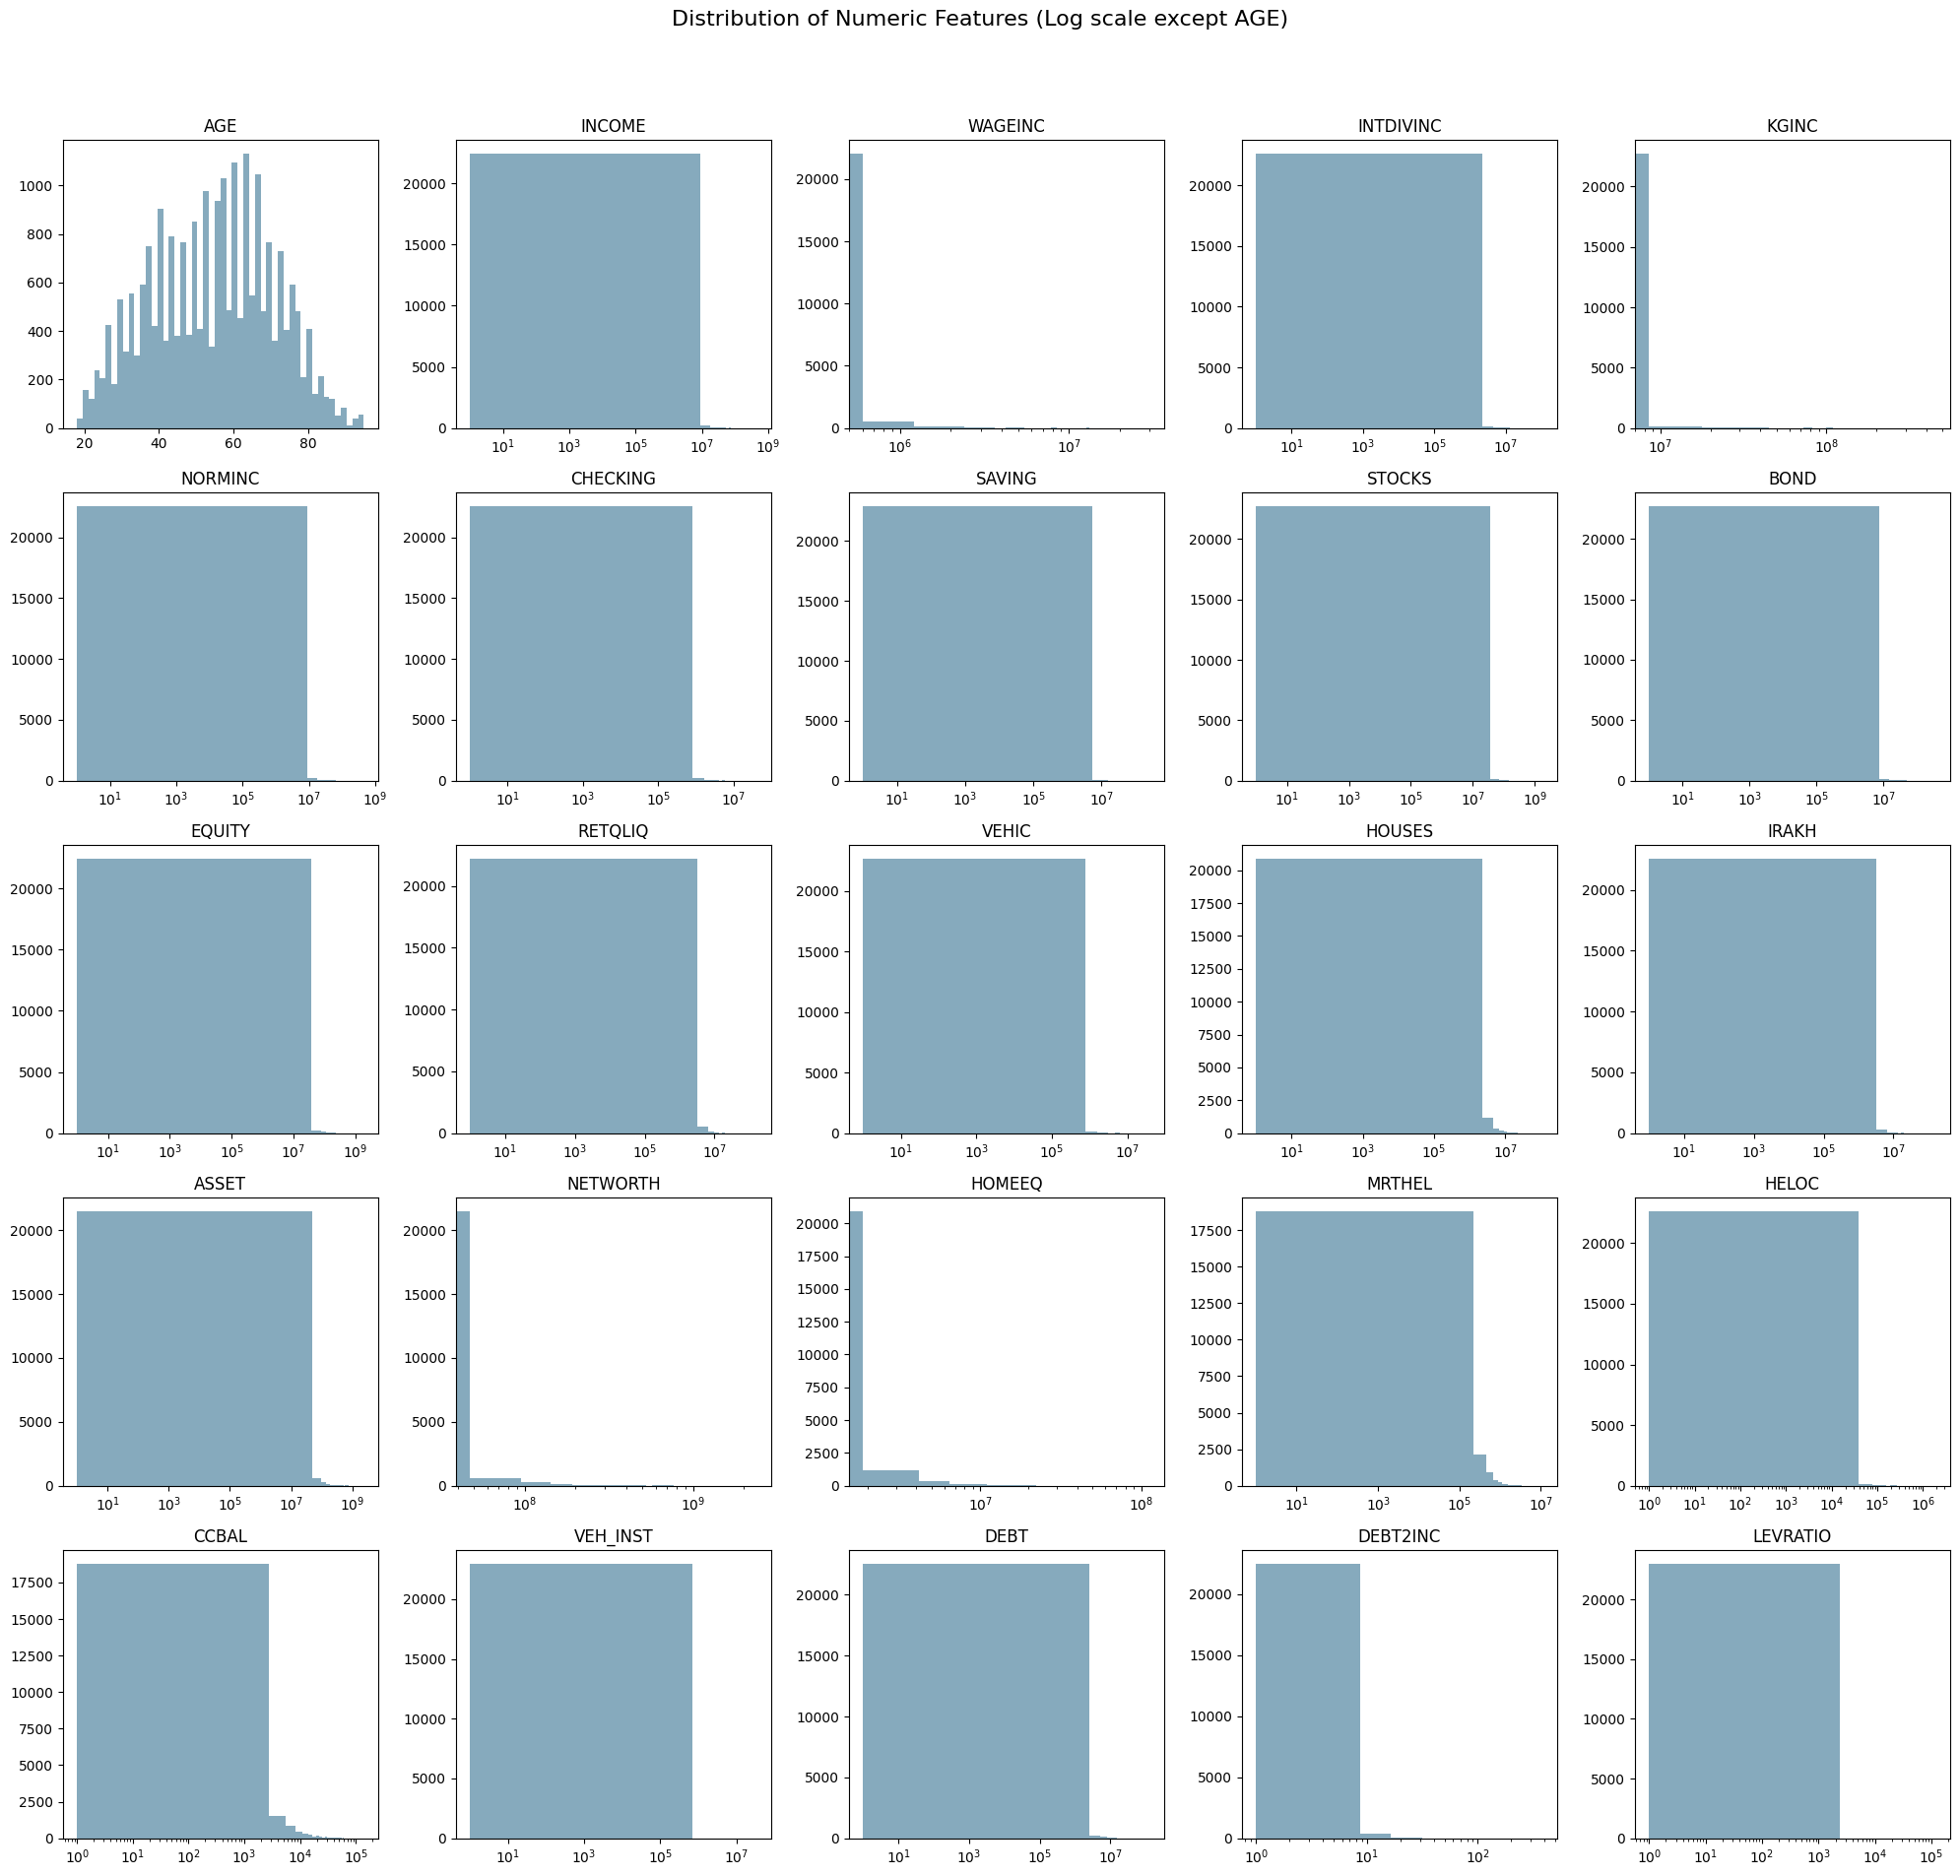

In [ ]:
color = "#86AABD"

num_vars = ['AGE', 'INCOME', 'WAGEINC', 'INTDIVINC', 'KGINC', 'NORMINC',
            'CHECKING', 'SAVING', 'STOCKS', 'BOND', 'EQUITY',
            'RETQLIQ', 'VEHIC', 'HOUSES', 'IRAKH', 'ASSET', 'NETWORTH', 'HOMEEQ',
            'MRTHEL', 'HELOC', 'CCBAL', 'VEH_INST', 'DEBT', 'DEBT2INC', 'LEVRATIO']

n_cols = 5
n_rows = int(np.ceil(len(num_vars) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    ax = axes[i]
    data = df[var].copy()

    if var != 'AGE':
        data = data + 1
        ax.set_xscale('log')

    ax.hist(data.dropna(), bins=50, color=color)
    ax.set_title(var)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Numeric Features (Log scale except AGE)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

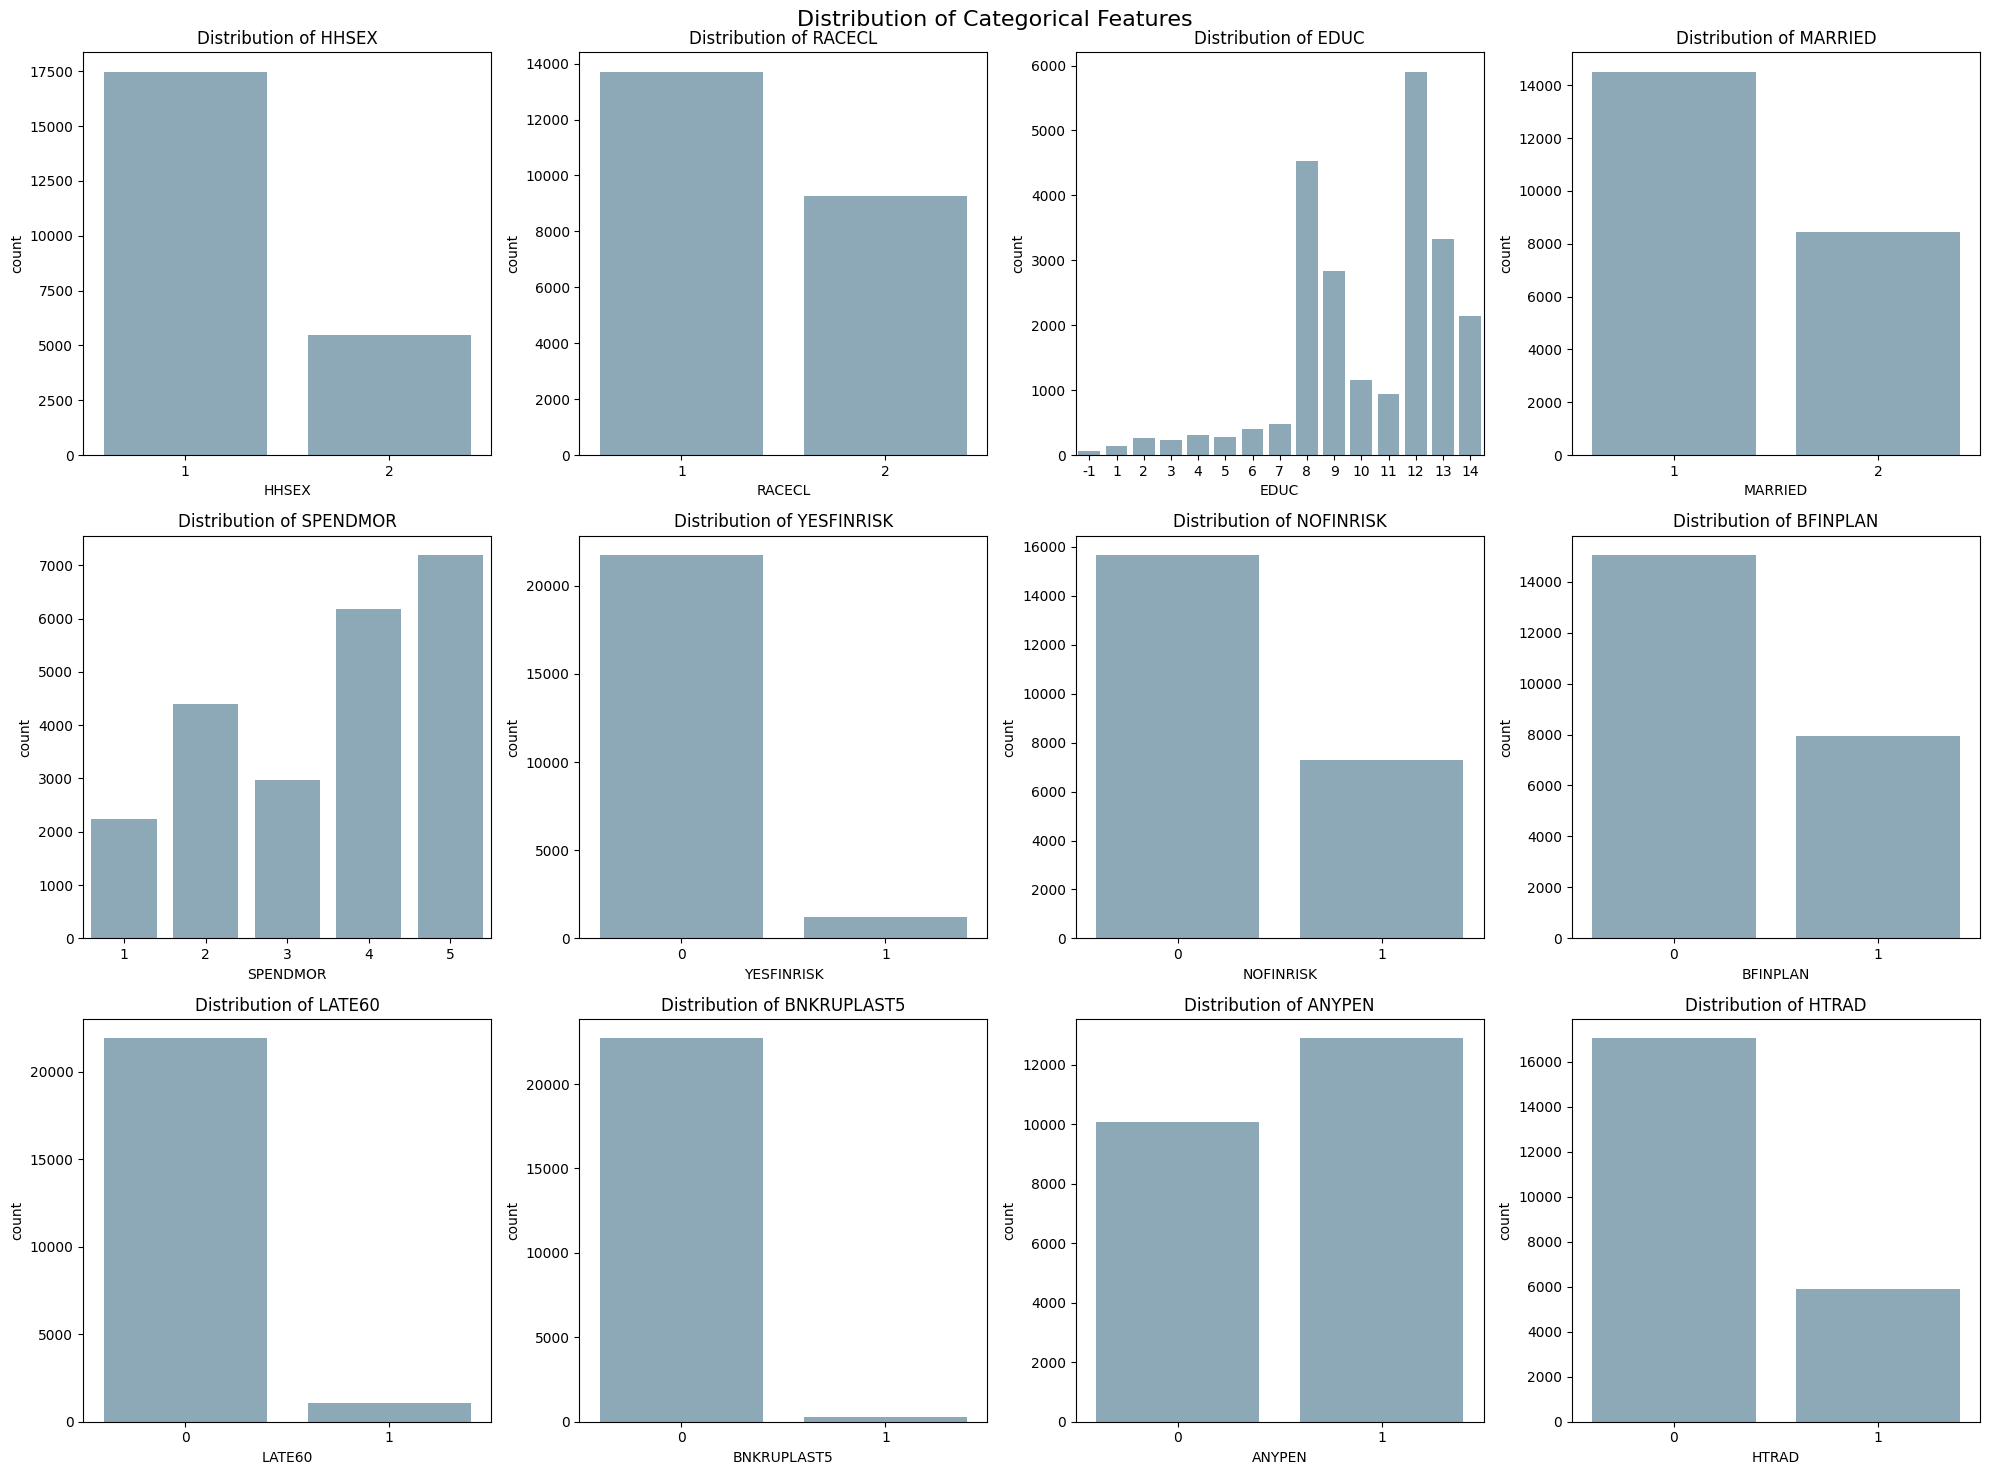

In [ ]:
cat_vars = ['HHSEX', 'RACECL', 'EDUC', 'MARRIED', 'SPENDMOR', 
            'YESFINRISK', 'NOFINRISK', 'BFINPLAN', 'LATE60', 'BNKRUPLAST5', 'ANYPEN', 'HTRAD']

n_cols = 4
n_rows = int(np.ceil(len(cat_vars) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    ax = axes[i]
    sns.countplot(data=df, x=var, ax=ax, color=color)
    ax.set_title(f'Distribution of {var}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Categorical Features", fontsize=16)
plt.tight_layout()
plt.show()

# LLM-based Dataset Construction

In [29]:
def generate_investor_description(row):
    """Generates a textual description of an investor based on ALL row variables"""
    description_parts = []
    

    gender = "Male" if row['HHSEX'] == 1 else "Female"
    description_parts.append(f"{gender}, age {int(row['AGE'])}")
    
    if row['RACECL'] == 1:
        description_parts.append("White/Caucasian")
    elif row['RACECL'] == 2:
        description_parts.append("Black/African-American")
    
    educ_map = {
        1: "less than 1st grade",
        2: "1st-4th grade",
        3: "5th-6th grade",
        4: "7th-8th grade",
        5: "9th grade",
        6: "10th grade",
        7: "11th grade",
        8: "12th grade (no diploma)",
        9: "high school graduate",
        10: "some college (no degree)",
        11: "associate degree (vocational)",
        12: "associate degree (academic)",
        13: "bachelor's degree",
        14: "master's/professional/doctoral degree"
    }
    if not pd.isna(row['EDUC']) and row['EDUC'] in educ_map:
        description_parts.append(f"education: {educ_map[row['EDUC']]}")
    
    if row['MARRIED'] == 1:
        description_parts.append("married")
    elif row['MARRIED'] == 2:
        description_parts.append("not married")
    
    if row['KIDS'] > 0:
        description_parts.append(f"with {int(row['KIDS'])} children")
    else:
        description_parts.append("no children")
    

    income_desc = f"annual income: ${int(row['INCOME']):,}"
    income_sources = []
    if row['WAGEINC'] > 0: 
        income_sources.append(f"wages: ${int(row['WAGEINC']):,}")
    if row['INTDIVINC'] > 0: 
        income_sources.append(f"dividends: ${int(row['INTDIVINC']):,}")
    if row['KGINC'] > 0: 
        income_sources.append(f"capital gains: ${int(row['KGINC']):,}")
    
    if income_sources:
        income_desc += f" ({'; '.join(income_sources)})"
    description_parts.append(income_desc)
    
    if row['NORMINC'] < 40000:
        description_parts.append("low normalized income")
    elif row['NORMINC'] < 100000:
        description_parts.append("medium normalized income")
    else:
        description_parts.append("high normalized income")
    
    assets = []
    if row['CHECKING'] > 0: assets.append(f"checking: ${int(row['CHECKING']):,}")
    if row['SAVING'] > 0: assets.append(f"savings: ${int(row['SAVING']):,}")
    if row['STOCKS'] > 0: assets.append(f"stocks: ${int(row['STOCKS']):,}")
    if row['BOND'] > 0: assets.append(f"bonds: ${int(row['BOND']):,}")
    if row['EQUITY'] > 0: assets.append(f"business equity: ${int(row['EQUITY']):,}")
    if row['RETQLIQ'] > 0: assets.append(f"retirement accounts: ${int(row['RETQLIQ']):,}")
    if row['VEHIC'] > 0: assets.append(f"vehicles: ${int(row['VEHIC']):,}")
    if row['HOUSES'] > 0: assets.append(f"real estate: ${int(row['HOUSES']):,}")
    if row['IRAKH'] > 0: assets.append(f"IRA/Keogh: ${int(row['IRAKH']):,}")
    
    if assets:
        description_parts.append(f"assets: {', '.join(assets)}")
    
    description_parts.append(f"total assets: ${int(row['ASSET']):,}")
    
    nw_desc = f"net worth: ${int(row['NETWORTH']):,}"
    if row['NETWORTH'] < 100000:
        nw_desc += " (low)"
    elif row['NETWORTH'] < 500000:
        nw_desc += " (medium)"
    else:
        nw_desc += " (high)"
    description_parts.append(nw_desc)
    
    if row['HOMEEQ'] > 0:
        description_parts.append(f"home equity: ${int(row['HOMEEQ']):,}")
    
    debts = []
    if row['MRTHEL'] > 0: debts.append(f"mortgage: ${int(row['MRTHEL']):,}")
    if row['HELOC'] > 0: debts.append(f"home loan: ${int(row['HELOC']):,}")
    if row['CCBAL'] > 0: debts.append(f"credit cards: ${int(row['CCBAL']):,}")
    if row['VEH_INST'] > 0: debts.append(f"auto loans: ${int(row['VEH_INST']):,}")
    
    if debts:
        description_parts.append(f"debts: {', '.join(debts)}")
        description_parts.append(f"total debt: ${int(row['DEBT']):,}")
    
    debt_ratio_desc = "low" if row['DEBT2INC'] < 0.3 else \
                    "moderate" if row['DEBT2INC'] < 0.5 else "high"
    description_parts.append(f"debt-to-income: {row['DEBT2INC']:.1f} ({debt_ratio_desc})")
    
    if row['LEVRATIO'] > 1.0:
        description_parts.append(f"high leverage ({row['LEVRATIO']:.1f})")
    
    if row['YESFINRISK'] == 1:
        description_parts.append("risk-tolerant")
    elif row['NOFINRISK'] == 1:
        description_parts.append("risk-averse")
    
    savings_behavior_map = {
        1: "doesn't save - usually spends more than income",
        2: "doesn't save - usually spends about as much as income",
        3: "saves whatever is left over (no regular plan)",
        4: "saves income of one family member, spends the other",
        5: "saves regularly by putting money aside each month"
    }
    if not pd.isna(row['SPENDMOR']) and row['SPENDMOR'] in savings_behavior_map:
        description_parts.append(f"savings behavior: {savings_behavior_map[row['SPENDMOR']]}")
    
    if row['BFINPLAN'] == 1:
        description_parts.append("has financial plan")
    
    if row['LATE60'] == 1:
        description_parts.append("had >60 day payment delays")
    if row['BNKRUPLAST5'] == 1:
        description_parts.append("bankruptcy in last 5 years")
    
    if row['ANYPEN'] == 1:
        description_parts.append("has retirement accounts")

    
    if row['HTRAD'] == 1:
        trader_desc = "active trader"
    else:
        trader_desc = "passive investor"
    
    description_parts.append(f"{trader_desc}")

    return ". ".join(description_parts) + "."

In [ ]:
all_images = [
    {
        "id": "1-1-1-1",
        "title": "Formation in Duloc",
        "description": "Orderly castle courtyard in Duloc. Uniformed knights march in sync. Donkey shouts commands like a sergeant. Lord Farquaad measures distance with a ruler. Clean pastel tones, precise geometry."
    },
    {
        "id": "1-1-1-2",
        "title": "Solo Training",
        "description": "Shrek trains alone in a tidy gym in Duloc. Punches a hanging straw dummy. Wall has schedule 'Fight: 9am-5pm'. Outside - boring grey Duloc skyline. Shield on the wall, clean pastel lighting."
    },
    {
        "id": "1-1-2-1",
        "title": "Post-Party Chaos",
        "description": "In the Duloc throne room, total chaos after party. Broken dishes, sleeping princess on chandelier, Donkey DJs on table. Shrek in guard armor facepalms. Warm lighting, red carpets, messy royal room."
    },
    {
        "id": "1-1-2-2",
        "title": "Dungeon Debris",
        "description": "Shrek alone in a dark dungeon under the castle. Debris from broken cages, graffiti 'Puss was here' on wall. Shield leaned against rocks. Torchlight creates dramatic shadows."
    },
    {
        "id": "1-2-1-1",
        "title": "Farquaad's Tea Party",
        "description": "Lord Farquaad drinks tea in a large hall with empty guest chairs. Behind window - dull military parade. Tea set, cookies, banner 'Order is Power'. Soft light, pale pastel colors."
    },
    {
        "id": "1-2-1-2",
        "title": "Self-Discovery",
        "description": "Shrek sits in Duloc library reading 'How to Be Human'. Neatly arranged bookshelves. Cozy brown carpet with Duloc emblem. Warm lamp light. Coffee cup on floor."
    },
    {
        "id": "1-2-2-1",
        "title": "Royal Hangover",
        "description": "After a royal party, everyone sleeps in random places. Donkey hugs a keg. Shrek snoring in crown. Half-fallen Duloc banners. Royal room in disarray, warm tones."
    },
    {
        "id": "1-2-2-2",
        "title": "Carriage Nap",
        "description": "Shrek naps alone in a royal carriage under a blanket. Unicorns slowly pull it through forest. A 'Slow!' sign on back. Books and tea cup scattered inside."
    },
    {
        "id": "2-1-1-1",
        "title": "Swamp Races",
        "description": "Shrek, Fiona and Donkey race playfully through the swamp. Makeshift flags, energetic motion. House visible in background. Cartoon-realistic lighting, rich greens."
    },
    {
        "id": "2-1-1-2",
        "title": "Perfect Lumberjack",
        "description": "Shrek chopping wood neatly. Logs stacked in perfect pyramid. Fiona watching from window with book. Forest clearing, orderly and calm. Signpost: 'Freedom in Effort'."
    },
    {
        "id": "2-1-2-1",
        "title": "Tavern on Fire",
        "description": "Wild tavern party. Trolls dance on tables, Donkey sings loudly. Lights flicker. Mess everywhere. Wooden cups, spilled drinks. Swamp pub atmosphere."
    },
    {
        "id": "2-1-2-2",
        "title": "Lonely Firefighting",
        "description": "Shrek puts out burning house. Puss in Boots calmly washes himself nearby. Smoke fills scene. Fence says 'No Entry'. Chaotic but personal."
    },
    {
        "id": "2-2-1-1",
        "title": "Family Picnic",
        "description": "Cozy picnic at swamp. Fiona sets food, Donkey entertains piglets. Everything neatly laid out. Lanterns, blanket, food baskets."
    },
    {
        "id": "2-2-1-2",
        "title": "Shrek's Hammock",
        "description": "Shrek naps in hammock between trees. Bird holds 'Do Not Disturb' sign. Perfectly trimmed grass. Puss in Boots asleep on book."
    },
    {
        "id": "2-2-2-1",
        "title": "Campfire Chatter",
        "description": "Around a swamp campfire at night, Shrek, Donkey, Fiona, and Puss argue and laugh loudly. Fire reflects on faces. Cups and snacks scattered."
    },
    {
        "id": "2-2-2-2",
        "title": "Shrek in a Puddle",
        "description": "Shrek lies peacefully in a puddle under rain. Frogs jumping on him. 'Life is good' sign nearby. Calm, introspective, nature tones."
    },
    {
        "id": "0-0-0-0",
        "title": "Control Scene: Outhouse Queue",
        "description": "Neutral Shrek-style scene. Everyone - Shrek, Fiona, Donkey, Puss - waiting quietly in line near outhouse. No action, no expression. Donkey stares at hourglass. Faint lighting, grayish tones."
    }
]

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=OPENROUTER_API_KEY,
)

In [31]:
def get_image_selection(investor_desc):
    """
    Selects three most suitable Shrek-themed images for an investor based on their profile description.
    
    Args:
        investor_desc (str): Description of the investor's characteristics and preferences
        
    Returns:
        list: Three image IDs in order of preference, or None if error occurs
    """
    
    images_text = "\n".join([
        f"{img['id']} - {img['title']}: {img['description']}" 
        for img in all_images
    ])
    
    prompt = f"""Imagine you're an investor with these characteristics:
    {investor_desc}

    Below are descriptions of various scenes from the Shrek universe. Select THREE images that:
    1. Best match your personality and preferences
    2. Align with your investment style
    3. Appeal to your visual taste
    
    Rank them in descending order of preference (most suitable first). Base your choices solely on the image content and atmosphere.

    Available images:
    {images_text}

    Your response should contain ONLY the selected image numbers in preference order, separated by commas. Example:
    2-1-1-1, 1-2-2-2, 1-1-1-1"""

    try:
        
        response = client.chat.completions.create(
            model="deepseek/deepseek-chat-v3-0324:free",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            top_p=1.0,
            max_tokens=100
        )
        
        choices = [
            choice.strip() 
            for choice in response.choices[0].message.content.split(",")
            if choice.strip() in [img["id"] for img in all_images]
        ]
        
        return choices[:3]
        
    except Exception as e:
        print(f"Error in image selection API call: {str(e)}")
        return None

In [ ]:
def process_investor_data(df, output_csv='investor_image_choices.csv'):
    results = []

    for index, row in df.iterrows():
        print(f"\nОбработка строки {index + 1}/{len(df)}")

        investor_desc = generate_investor_description(row)
        print(f"Описание инвестора: {investor_desc}")

        selected_images = get_image_selection(investor_desc)

        if selected_images:
            print(f"Выбранные картинки: {', '.join(selected_images)}")

            results.append({
                "row_index": index,
                "investor_description": investor_desc,
                "first_choice": selected_images[0] if len(selected_images) > 0 else None,
                "second_choice": selected_images[1] if len(selected_images) > 1 else None,
                "third_choice": selected_images[2] if len(selected_images) > 2 else None
            })
        else:
            print("Не удалось получить выбор картинок")

        # time.sleep(1)

    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=False)
    print(f"\nРезультаты сохранены в {output_csv}")
    return results_df


In [ ]:
sample_df = df.sample(2)
sample_df

,HHSEX,AGE,RACECL,EDUC,MARRIED,KIDS,INCOME,WAGEINC,INTDIVINC,KGINC,...,DEBT2INC,LEVRATIO,YESFINRISK,NOFINRISK,SPENDMOR,BFINPLAN,LATE60,BNKRUPLAST5,ANYPEN,HTRAD
20310,2,53,1,8,2,1,45398.296593,45398.296593,0.0,0.0,...,0.611256,0.267084,0,1,5,0,0,0,1,0
22480,2,59,1,12,2,1,51883.767535,51883.767535,0.0,0.0,...,0.000000,0.000000,0,1,4,0,0,0,1,0


In [45]:
process_investor_data(sample_df)


Обработка строки 20311/2
Описание инвестора: Female, age 53. White/Caucasian. education: 12th grade (no diploma). not married. with 1 children. annual income: $45,398 (wages: $45,398). medium normalized income. assets: checking: $6,000, business equity: $50,000, retirement accounts: $50,000, vehicles: $47,900. total assets: $103,900. net worth: $76,150 (low). debts: credit cards: $3,000, auto loans: $24,710. total debt: $27,750. debt-to-income: 0.6 (high). risk-averse. savings behavior: saves regularly by putting money aside each month. has retirement accounts. passive investor.
Выбранные картинки: 2-2-1-1, 2-1-1-2, 1-2-1-2

Обработка строки 22481/2
Описание инвестора: Female, age 59. White/Caucasian. education: associate degree (academic). not married. with 1 children. annual income: $51,883 (wages: $51,883). medium normalized income. assets: checking: $230, savings: $117,000, business equity: $6,250, vehicles: $18,000, real estate: $600,000. total assets: $773,030. net worth: $773,0

,row_index,investor_description,first_choice,second_choice,third_choice
0,20310,"Female, age 53. White/Caucasian. education: 12...",2-2-1-1,2-1-1-2,1-2-1-2
1,22480,"Female, age 59. White/Caucasian. education: as...",1-2-1-2,2-2-1-2,2-1-1-2


In [46]:
process_investor_data(sample_df)


Обработка строки 20311/2
Описание инвестора: Female, age 53. White/Caucasian. education: 12th grade (no diploma). not married. with 1 children. annual income: $45,398 (wages: $45,398). medium normalized income. assets: checking: $6,000, business equity: $50,000, retirement accounts: $50,000, vehicles: $47,900. total assets: $103,900. net worth: $76,150 (low). debts: credit cards: $3,000, auto loans: $24,710. total debt: $27,750. debt-to-income: 0.6 (high). risk-averse. savings behavior: saves regularly by putting money aside each month. has retirement accounts. passive investor.
Выбранные картинки: 1-2-1-2, 2-2-1-2, 2-2-2-2

Обработка строки 22481/2
Описание инвестора: Female, age 59. White/Caucasian. education: associate degree (academic). not married. with 1 children. annual income: $51,883 (wages: $51,883). medium normalized income. assets: checking: $230, savings: $117,000, business equity: $6,250, vehicles: $18,000, real estate: $600,000. total assets: $773,030. net worth: $773,0

,row_index,investor_description,first_choice,second_choice,third_choice
0,20310,"Female, age 53. White/Caucasian. education: 12...",1-2-1-2,2-2-1-2,2-2-2-2
1,22480,"Female, age 59. White/Caucasian. education: as...",1-2-1-2,2-2-1-2,2-1-1-2
